<a href="https://colab.research.google.com/github/dadevansh/ML-projects/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-lv3nkvsb
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-lv3nkvsb
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0f82f2a94252f97efd2cdbc57408469e1d4cd9774_-cp36-none-any.whl size=119874 sha256=87cc700a68f059044ae3c08a507806a96fd13cd87159a98687625e8bf27bb882
  Stored in directory: /tmp/pip-ephem-wheel-cache-r9onjf6j/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [22]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [21]:
column_names=['MPG', 'Cylinder', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset=pd.read_csv(dataset_path, names=column_names, na_values="?", comment='\t', sep=' ', skipinitialspace=True)

dataset= raw_dataset.copy()
dataset.tail()

,MPG,Cylinder,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [23]:
dataset.isna().sum()

MPG             0
Cylinder        0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [24]:
dataset=dataset.dropna()

In [25]:
dataset['Origin']= dataset['Origin'].map({1: 'USA', 2:'Europe', 3: 'Japan'})
dataset=pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinder,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [26]:
train_dataset=dataset.sample(frac=0.8, random_state=0)
test_dataset=dataset.drop(train_dataset.index)

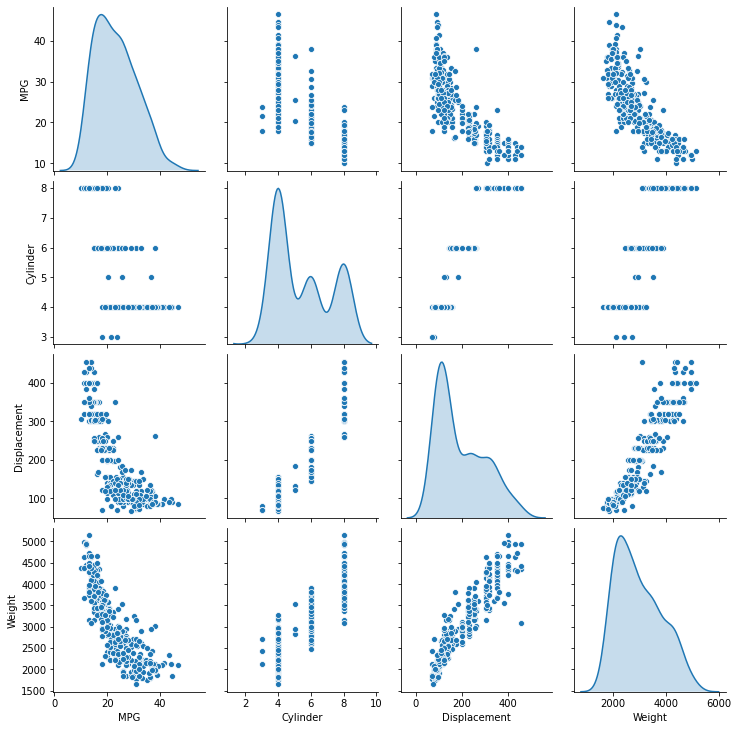

In [27]:
sns.pairplot(train_dataset[['MPG', 'Cylinder', 'Displacement', 'Weight']], diag_kind='kde')

In [28]:
train_stats= train_dataset.describe()
train_stats.pop("MPG")
train_stats= train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinder,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [29]:
train_labels=train_dataset.pop('MPG')
test_labels=test_dataset.pop('MPG')

In [14]:
def norm(x):
  return (x- train_stats['mean']) / train_stats['std']

  
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)


In [15]:
def build_model():
  model=keras.Sequential([
                          layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(1)
  ])

  optimizer=tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  
  return model

In [16]:
model=build_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [18]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.26233894],
       [0.09221013],
       [0.33555812],
       [0.35738716],
       [0.6577162 ],
       [0.19554311],
       [0.6558479 ],
       [0.42335546],
       [0.2473517 ],
       [0.4497679 ]], dtype=float32)

In [35]:
EPOCHS = 1000

history=model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:546.2688,  mae:22.0743,  mse:546.2688,  val_loss:531.2396,  val_mae:21.6694,  val_mse:531.2396,  
....................................................................................................
Epoch: 100, loss:6.1224,  mae:1.7415,  mse:6.1224,  val_loss:8.8452,  val_mae:2.3470,  val_mse:8.8452,  
....................................................................................................
Epoch: 200, loss:5.4291,  mae:1.5757,  mse:5.4291,  val_loss:8.7071,  val_mae:2.2742,  val_mse:8.7071,  
....................................................................................................
Epoch: 300, loss:4.9548,  mae:1.4899,  mse:4.9548,  val_loss:8.5449,  val_mae:2.2387,  val_mse:8.5449,  
....................................................................................................
Epoch: 400, loss:4.2917,  mae:1.3971,  mse:4.2917,  val_loss:9.1791,  val_mae:2.3968,  val_mse:9.1791,  
..............................................................

In [37]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.757421,1.047543,2.757421,8.538047,2.304460,8.538047,995
996,2.729506,1.069308,2.729506,8.824028,2.354936,8.824028,996
997,2.622874,1.042885,2.622874,8.734629,2.356085,8.734629,997
998,2.676940,1.066175,2.676940,9.113839,2.201244,9.113839,998
999,2.892278,1.087812,2.892278,8.536995,2.201618,8.536995,999


In [39]:
plotter=tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE[MPG]')

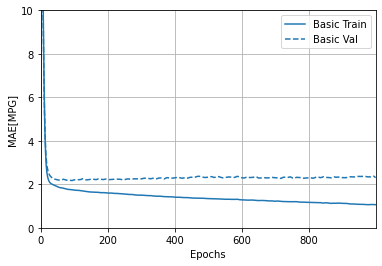

In [40]:
plotter.plot({'Basic' : history}, metric='mae')
plt.ylim([0,10])
plt.ylabel('MAE[MPG]')

Text(0, 0.5, 'MAE[MPG^2]')

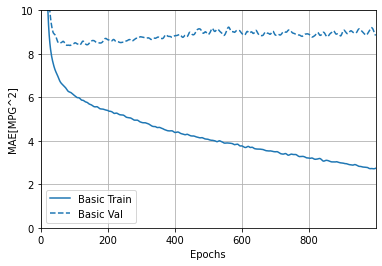

In [41]:
plotter.plot({'Basic' : history}, metric='mse')
plt.ylim([0,10])
plt.ylabel('MAE[MPG^2]')

In [44]:
model=build_model()

early_stop= keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history= model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:570.6198,  mae:22.5788,  mse:570.6198,  val_loss:556.6262,  val_mae:22.2015,  val_mse:556.6262,  
............................................................

Text(0, 0.5, 'MAE[MPG]')

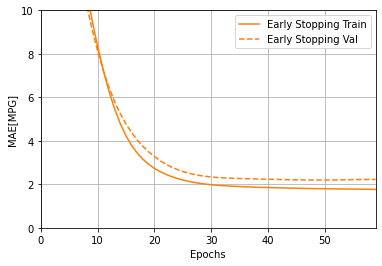

In [45]:
plotter.plot({'Early Stopping': early_history}, metric='mae')
plt.ylim([0,10])
plt.ylabel('MAE[MPG]')

In [46]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.3977 - mae: 1.7350 - mse: 5.3977
Testing set Mean Abs Error:  1.73 MPG


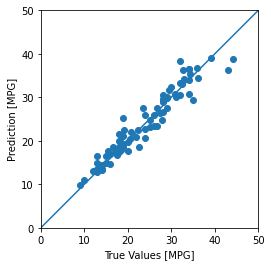

In [48]:
test_predictions = model.predict(normed_test_data).flatten()

a=plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Prediction [MPG]')
lims=[0,50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims,lims)

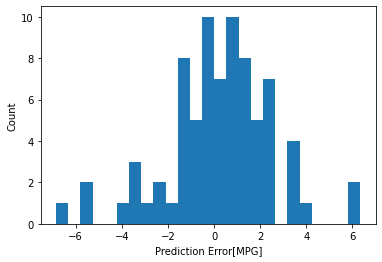

In [51]:
error= (test_predictions - test_labels)
plt.hist(error, bins=25)
plt.xlabel('Prediction Error[MPG]')
_=plt.ylabel('Count')